# TDS3651 ASSIGNMENT - PERIVITTA RAJENDRAN

## 1.0 Importing Packages .....

In [1]:
import cv2
import sys
import numpy as np
from matplotlib import pyplot as plt

## 1.1 Getting the numpy arrays for lower and upper boundaries 

In [ ]:
def nothing(x):
    pass

useCamera=False

# Check if filename is passed
if (len(sys.argv) <= 1) :
    print ("'Usage: python hsvThresholder.py <ImageFilePath>' to ignore camera and use a local image.")
    useCamera = True

# Create a window
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('HMin','image',0,179,nothing) # Hue is from 0-179 for Opencv
cv2.createTrackbar('SMin','image',0,255,nothing)
cv2.createTrackbar('VMin','image',0,255,nothing)
cv2.createTrackbar('HMax','image',0,179,nothing)
cv2.createTrackbar('SMax','image',0,255,nothing)
cv2.createTrackbar('VMax','image',0,255,nothing)

# Set default value for MAX HSV trackbars.
cv2.setTrackbarPos('HMax', 'image', 179)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize to check if HSV min/max value changes
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

# Output Image to display
if useCamera:
    cap = cv2.VideoCapture(0)
    # Wait longer to prevent freeze for videos.
    waitTime = 330
else:
#     img = cv2.imread('add_dataset/add_groundtruth/personne10152+0+90.bmp')
    img = cv2.imread('dataset/test/01.bmp')
    output = img
    waitTime = 33

while(1):

    if useCamera:
        # Capture frame-by-frame
        ret, img = cap.read()
        output = img

    # get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin','image')
    sMin = cv2.getTrackbarPos('SMin','image')
    vMin = cv2.getTrackbarPos('VMin','image')

    hMax = cv2.getTrackbarPos('HMax','image')
    sMax = cv2.getTrackbarPos('SMax','image')
    vMax = cv2.getTrackbarPos('VMax','image')

    # Set minimum and max HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Create HSV Image and threshold into a range.
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    output = cv2.bitwise_and(img,img, mask= mask)

    # Print if there is a change in HSV value
    if( (phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display output image
    cv2.imshow('image',output)
    # Wait longer to prevent freeze for videos.
    if cv2.waitKey(waitTime) & 0xFF == ord('q'):
        break
# Release resources
if useCamera:
    cap.release()
cv2.destroyAllWindows()

## 1.2 Face Segmentation 

Figuring out the steps that will be implemented for each segments

In [2]:
img = cv2.imread('dataset/test/01.bmp')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

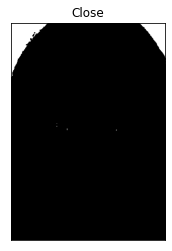

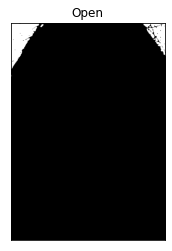

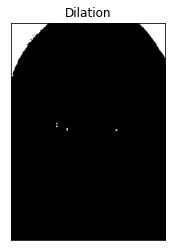

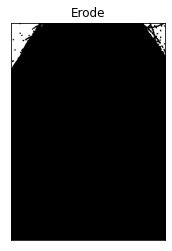

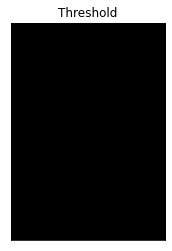

In [3]:
lower_bg = np.array([0 , 0, 178], dtype = "uint8")
upper_bg = np.array([149, 15, 255], dtype = "uint8")
mask = cv2.inRange(img_hsv, lower_bg, upper_bg)

kernel = np.ones((3,3),np.uint8) 

close = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations = 1) ## using this
plt.title('Close'), plt.xticks([]), plt.yticks([])
plt.imshow(close, cmap='gray');
plt.show()

opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations = 1)
plt.title('Open'), plt.xticks([]), plt.yticks([])
plt.imshow(opening, cmap='gray');
plt.show()

dilation = cv2.dilate(mask, kernel, iterations = 1) 
plt.title('Dilation'), plt.xticks([]), plt.yticks([])
plt.imshow(dilation, cmap='gray');
plt.show()

erode = cv2.erode(mask, kernel, iterations = 1) 
plt.title('Erode'), plt.xticks([]), plt.yticks([])
plt.imshow(erode, cmap='gray');
plt.show()

ret,th = cv2.threshold(close,40,0,cv2.THRESH_BINARY)
plt.title('Threshold'), plt.xticks([]), plt.yticks([])
plt.imshow(th, cmap='gray');
plt.show()


## Hair Segmentation 

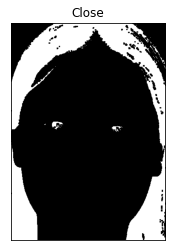

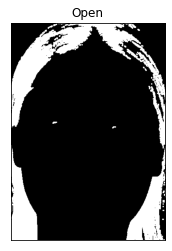

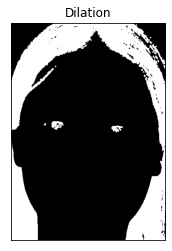

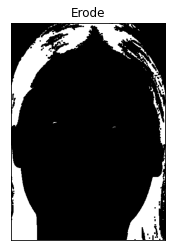

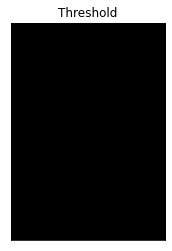

In [4]:
lower_hair = np.array([0 , 0, 0], dtype = "uint8")
upper_hair = np.array([180, 255, 20], dtype = "uint8")
mask1 = cv2.inRange(img_hsv, lower_hair, upper_hair)

kernel = np.ones((3,3),np.uint8) 

close = cv2.morphologyEx(mask1, cv2.MORPH_CLOSE, kernel, iterations = 1)
plt.title('Close'), plt.xticks([]), plt.yticks([])
plt.imshow(close, cmap='gray');
plt.show()

opening1 = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, kernel, iterations = 1) ##using this
plt.title('Open'), plt.xticks([]), plt.yticks([])
plt.imshow(opening1, cmap='gray');
plt.show()

dilation = cv2.dilate(mask1, kernel, iterations = 1) 
plt.title('Dilation'), plt.xticks([]), plt.yticks([])
plt.imshow(dilation, cmap='gray');
plt.show()

erode = cv2.erode(mask1, kernel, iterations = 1) 
plt.title('Erode'), plt.xticks([]), plt.yticks([])
plt.imshow(erode, cmap='gray');
plt.show()

ret1,th1 = cv2.threshold(opening1,40,1,cv2.THRESH_BINARY)
plt.title('Threshold'), plt.xticks([]), plt.yticks([])
plt.imshow(th1, cmap='gray');
plt.show()


## Lips Segmentation 

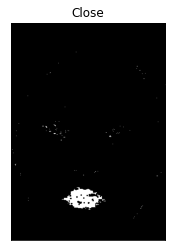

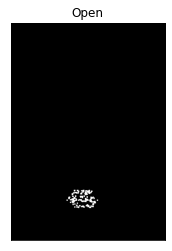

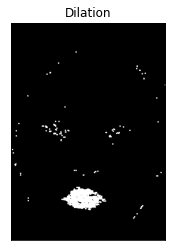

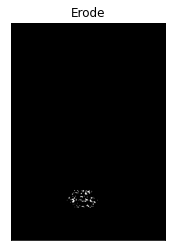

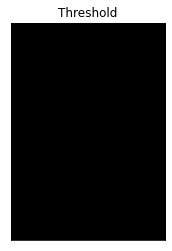

In [5]:
lower_mouth = np.array([0 , 82, 0],dtype = "uint8")
upper_mouth = np.array([3, 255, 255],dtype = "uint8")
mask2 = cv2.inRange(img_hsv, lower_mouth, upper_mouth)

kernel = np.ones((3,3),np.uint8) 

close = cv2.morphologyEx(mask2, cv2.MORPH_CLOSE, kernel, iterations = 1)
plt.title('Close'), plt.xticks([]), plt.yticks([])
plt.imshow(close, cmap='gray');
plt.show()

opening2 = cv2.morphologyEx(mask2, cv2.MORPH_OPEN, kernel, iterations = 1) ##using this
plt.title('Open'), plt.xticks([]), plt.yticks([])
plt.imshow(opening2, cmap='gray');
plt.show()

dilation = cv2.dilate(mask2, kernel, iterations = 1) 
plt.title('Dilation'), plt.xticks([]), plt.yticks([])
plt.imshow(dilation, cmap='gray');
plt.show()

erode = cv2.erode(mask2, kernel, iterations = 1) 
plt.title('Erode'), plt.xticks([]), plt.yticks([])
plt.imshow(erode, cmap='gray');
plt.show()

ret2,th2 = cv2.threshold(opening2,40,2,cv2.THRESH_BINARY)
plt.title('Threshold'), plt.xticks([]), plt.yticks([])
plt.imshow(th2, cmap='gray');
plt.show()


## Eyes Segmentation 

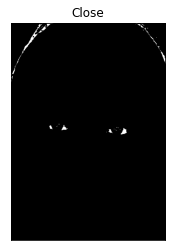

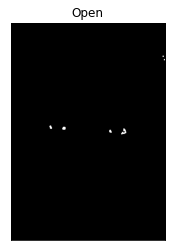

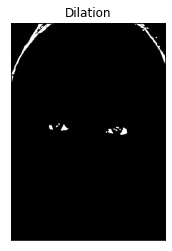

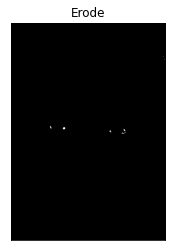

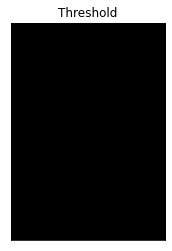

In [6]:
lower_eyes = np.array([0,0,125],dtype = "uint8")
upper_eyes = np.array([145,48,165],dtype = "uint8")  
mask3 = cv2.inRange(img_hsv, lower_eyes, upper_eyes)

kernel = np.ones((3,3),np.uint8) 

close = cv2.morphologyEx(mask3, cv2.MORPH_CLOSE, kernel, iterations = 1)
plt.title('Close'), plt.xticks([]), plt.yticks([])
plt.imshow(close, cmap='gray');
plt.show()

opening2 = cv2.morphologyEx(mask3, cv2.MORPH_OPEN, kernel, iterations = 1) ##using this
plt.title('Open'), plt.xticks([]), plt.yticks([])
plt.imshow(opening2, cmap='gray');
plt.show()

dilation3 = cv2.dilate(mask3, kernel, iterations = 1) 
plt.title('Dilation'), plt.xticks([]), plt.yticks([])
plt.imshow(dilation3, cmap='gray');
plt.show()

erode = cv2.erode(mask3, kernel, iterations = 1) 
plt.title('Erode'), plt.xticks([]), plt.yticks([])
plt.imshow(erode, cmap='gray');
plt.show()

ret3,th3 = cv2.threshold(dilation3,40,3,cv2.THRESH_BINARY)
plt.title('Threshold'), plt.xticks([]), plt.yticks([])
plt.imshow(th3, cmap='gray');
plt.show()

## Eyes Part 2 - Couldn't be detected on Dataset 2 so had to re-create

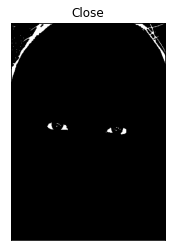

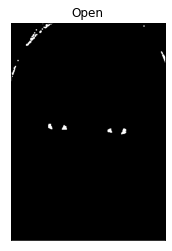

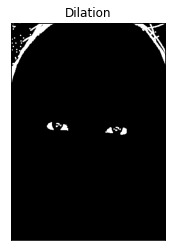

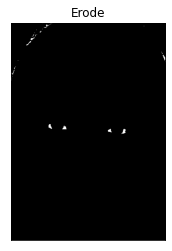

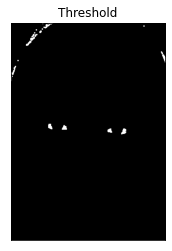

In [7]:
lower_eye4 = np.array([0 , 0, 92], dtype = "uint8")
upper_eye4 = np.array([177, 43, 181], dtype = "uint8")
mask43 = cv2.inRange(img_hsv, lower_eye4, upper_eye4)#masking hsv image

close = cv2.morphologyEx(mask43, cv2.MORPH_CLOSE, kernel, iterations = 1)
plt.title('Close'), plt.xticks([]), plt.yticks([])
plt.imshow(close, cmap='gray');
plt.show()

opening43 = cv2.morphologyEx(mask43, cv2.MORPH_OPEN, kernel, iterations = 1) ##using this
plt.title('Open'), plt.xticks([]), plt.yticks([])
plt.imshow(opening43, cmap='gray');
plt.show()

dilation3 = cv2.dilate(mask43, kernel, iterations = 1) 
plt.title('Dilation'), plt.xticks([]), plt.yticks([])
plt.imshow(dilation3, cmap='gray');
plt.show()

erode = cv2.erode(mask43, kernel, iterations = 1) 
plt.title('Erode'), plt.xticks([]), plt.yticks([])
plt.imshow(erode, cmap='gray');
plt.show()

ret43,th43 = cv2.threshold(opening43,60,3,cv2.THRESH_BINARY)
plt.title('Threshold'), plt.xticks([]), plt.yticks([])
plt.imshow(th43, cmap='gray');
plt.show()

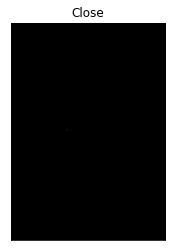

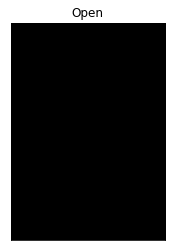

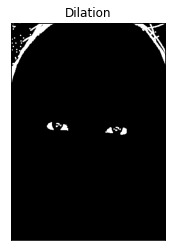

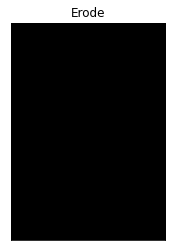

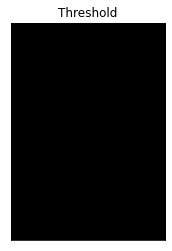

In [8]:
lower_hair1 = np.array([117,10,163],dtype = "uint8")
upper_hair1 = np.array([121,255,255],dtype = "uint8")  
mask11 = cv2.inRange(img_hsv, lower_hair1, upper_hair1)

close = cv2.morphologyEx(mask11, cv2.MORPH_CLOSE, kernel, iterations = 1)
plt.title('Close'), plt.xticks([]), plt.yticks([])
plt.imshow(close, cmap='gray');
plt.show()

opening11 = cv2.morphologyEx(mask11, cv2.MORPH_OPEN, kernel, iterations = 1) ##using this
plt.title('Open'), plt.xticks([]), plt.yticks([])
plt.imshow(opening11, cmap='gray');
plt.show()

dilation11 = cv2.dilate(mask11, kernel, iterations = 1) 
plt.title('Dilation'), plt.xticks([]), plt.yticks([])
plt.imshow(dilation3, cmap='gray');
plt.show()

erode = cv2.erode(mask11, kernel, iterations = 1) 
plt.title('Erode'), plt.xticks([]), plt.yticks([])
plt.imshow(erode, cmap='gray');
plt.show()

ret11,th11 = cv2.threshold(opening11,60,2,cv2.THRESH_BINARY)
plt.title('Threshold'), plt.xticks([]), plt.yticks([])
plt.imshow(th11, cmap='gray');
plt.show()


## Nose Segmentation 

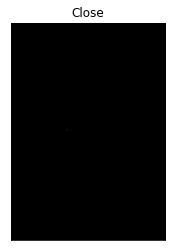

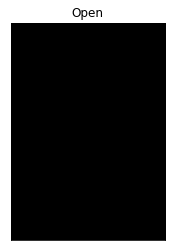

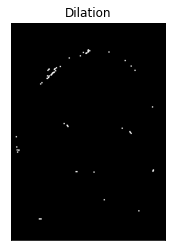

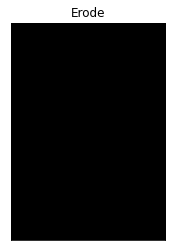

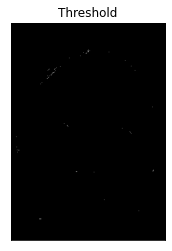

In [9]:
nose_lower = np.array([0, 201, 28], dtype = "uint8")  #nose
nose_upper = np.array([18, 229, 73], dtype = "uint8")
# nose_lower = np.array([5, 50, 102], dtype = "uint8")  #nose
# nose_upper = np.array([179, 190, 255], dtype = "uint8")
mask4 = cv2.inRange(img_hsv, nose_lower, nose_upper)

close4 = cv2.morphologyEx(mask4, cv2.MORPH_CLOSE, kernel, iterations = 1)
plt.title('Close'), plt.xticks([]), plt.yticks([])
plt.imshow(close, cmap='gray');
plt.show()

opening4 = cv2.morphologyEx(mask4, cv2.MORPH_OPEN, kernel, iterations = 1) ##using this
plt.title('Open'), plt.xticks([]), plt.yticks([])
plt.imshow(opening11, cmap='gray');
plt.show()

dilation4 = cv2.dilate(mask4, kernel, iterations = 1) 
plt.title('Dilation'), plt.xticks([]), plt.yticks([])
plt.imshow(dilation4, cmap='gray');
plt.show()

erode = cv2.erode(mask4, kernel, iterations = 1) 
plt.title('Erode'), plt.xticks([]), plt.yticks([])
plt.imshow(erode, cmap='gray');
plt.show()

ret4,th4 = cv2.threshold(close4,40,4,cv2.THRESH_BINARY)
plt.title('Threshold'), plt.xticks([]), plt.yticks([])
plt.imshow(th4, cmap='gray');
plt.show()


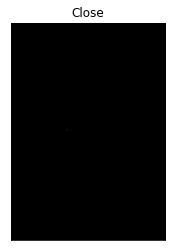

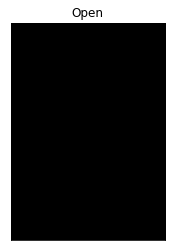

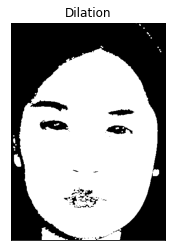

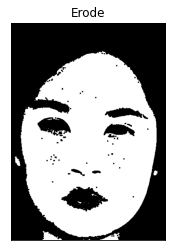

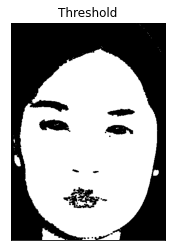

In [10]:
nose_lower1 = np.array([5, 50, 102], dtype = "uint8")  #nose
nose_upper1 = np.array([179, 190, 255], dtype = "uint8")
mask44 = cv2.inRange(img_hsv, nose_lower1, nose_upper1)

close44 = cv2.morphologyEx(mask44, cv2.MORPH_CLOSE, kernel, iterations = 1)
plt.title('Close'), plt.xticks([]), plt.yticks([])
plt.imshow(close, cmap='gray');
plt.show()

opening44 = cv2.morphologyEx(mask44, cv2.MORPH_OPEN, kernel, iterations = 1) ##using this
plt.title('Open'), plt.xticks([]), plt.yticks([])
plt.imshow(opening11, cmap='gray');
plt.show()

dilation4 = cv2.dilate(mask44, kernel, iterations = 1) 
plt.title('Dilation'), plt.xticks([]), plt.yticks([])
plt.imshow(dilation4, cmap='gray');
plt.show()

erode = cv2.erode(mask44, kernel, iterations = 1) 
plt.title('Erode'), plt.xticks([]), plt.yticks([])
plt.imshow(erode, cmap='gray');
plt.show()

ret44,th44 = cv2.threshold(close44,40,4,cv2.THRESH_BINARY)
plt.title('Threshold'), plt.xticks([]), plt.yticks([])
plt.imshow(th44, cmap='gray');
plt.show()



## Skin Segmentation 

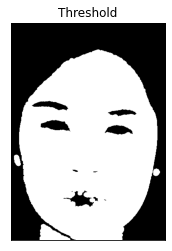

In [11]:
lower_skin = np.array([0, 48, 80], dtype = "uint8")
upper_skin = np.array([20, 255, 255], dtype = "uint8")
skinMask = cv2.inRange(img_hsv, lower_skin, upper_skin)

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

skinMask = cv2.erode(skinMask, kernel2, iterations = 1)
skinMask = cv2.dilate(skinMask, kernel2, iterations = 1)
skinMask = cv2.GaussianBlur(skinMask, (1, 1), 0)

ret5,th5 = cv2.threshold(skinMask,0,5,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.title('Threshold'), plt.xticks([]), plt.yticks([])
plt.imshow(th5, cmap='gray');
plt.show()

In [12]:
masks = th + th1 + th2 +th3 +th4 + th5 + th11 +  th44 + th43

outImg = np.clip(masks,0,255) 

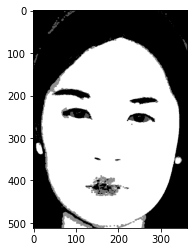

In [13]:
plt.imshow(outImg,cmap ='gray')

## Color segmentation - References [Color Palette] 

The type of this input is <class 'numpy.ndarray'>
Shape: (512, 363, 3)
Step1
TOP 
dict_values([40699, 19709, 16911, 9554, 25297, 35781, 33083, 58966])


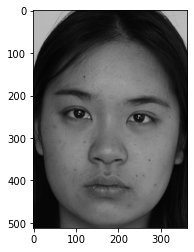

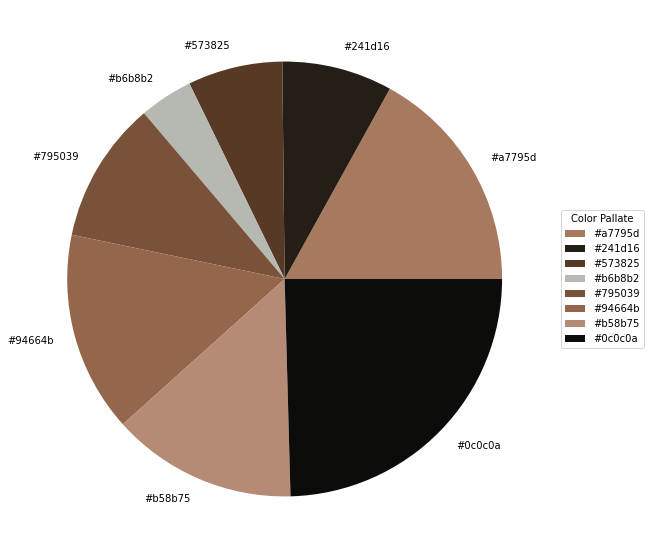

[{'hex_code': '#a7795d',
  'rgb_Value': ['167.27478509', '121.42441932', '93.6001872'],
  'percentage': 16.96},
 {'hex_code': '#241d16',
  'rgb_Value': ['36.07701888', '29.63353759', '22.10133014'],
  'percentage': 8.21},
 {'hex_code': '#573825',
  'rgb_Value': ['87.69744943', '56.66461448', '37.10683084'],
  'percentage': 7.05},
 {'hex_code': '#b6b8b2',
  'rgb_Value': ['182.25350638', '184.58028051', '178.22336194'],
  'percentage': 3.98},
 {'hex_code': '#795039',
  'rgb_Value': ['121.75441153', '80.56794549', '57.20068536'],
  'percentage': 10.54},
 {'hex_code': '#94664b',
  'rgb_Value': ['148.06357976', '102.04310635', '75.84902962'],
  'percentage': 14.91},
 {'hex_code': '#b58b75',
  'rgb_Value': ['181.02464629', '139.27994811', '117.98132674'],
  'percentage': 13.78},
 {'hex_code': '#0c0c0a',
  'rgb_Value': ['12.22805249', '12.20894987', '10.37725114'],
  'percentage': 24.57}]

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline
 
image = cv2.imread('dataset/test/01.bmp')
# image = cv2.imread('sample_image2.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
# plt.imshow(image)
print("Step1")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.show()
print("TOP ")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

resized_image = cv2.resize(image, (1200, 600))
# plt.imshow(resized_image)

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_colors(image, number_of_colors, show_chart):
    result = list()
    colorElements = dict()
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    # print(labels)
    counts = Counter(labels)
    # print("========")
    # print( dict(sorted(counts.items())))
    counts = dict(sorted(counts.items()))
    # print("========")
    center_colors = clf.cluster_centers_
    # print("+++++")
    # print(center_colors)
    # print("+++++")
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(center_colors[i]) for i in counts.keys()]
    rgb_colors = [center_colors[i] for i in counts.keys()]
    # print("HEX " + str(hex_colors))
    # print("RGB-ORDERED " + str(ordered_colors))
    # print("RBG " + str(rgb_colors))
    totalWeightage = sum(counts.values())
    for x in counts.keys():
        # print(str(counts[x]) + str(hex_colors[x]) + str(rgb_colors[x]))
        percentage = round((counts[x]/totalWeightage)*100, 2)
        val = str(rgb_colors[x])
        val = val[1:len(val)-1]
        val = ''.join(val).split()
        # print(val)

        result.append({
            "hex_code": hex_colors[x],
            "rgb_Value": val,
            "percentage": percentage
        })

    if (show_chart):
        plt.figure(figsize = (10, 10))
        print(counts.values())
        wedges, texts = plt.pie(counts.values(), colors=ordered_colors, labels = hex_colors)
        plt.legend(wedges, hex_colors, title="Color Pallate", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        plt.show()
    
    # return rgb_colors
    return result

get_colors(get_image('dataset/test/01.bmp'), 8, True)

## Trials 

In [17]:
img=cv2.imread('dataset/test/01.bmp',cv2.COLOR_BGR2GRAY)
mask = cv2.medianBlur(img,3)
pic=cv2.cvtColor(mask,cv2.COLOR_BGR2HSV)
mm = pic[:,:,2]

pink= [255, 255, 255]
purple= [ 64,  64,  64]
green=[  0,   0,  0]
yellow= [160,160,164]
gold= [192,192,192]
new= [ 96,  96, 128]
# skin= [ 255, 255, 255]
# hb= [ 64,  64,  64]
# bk =[ 0, 0, 0]
# eyes= [ 160, 160, 164]
# nose= [ 192, 192, 192]
# mouth = [ 96,  96, 128]

yellow_range = (200,255)
orange_range = (151,200)
green_range= (101,150)
purple_range =(51,100)
pink_range=(26,50)
red_range = (0,25) #### the gray hair potion is correct oredy

pop_art = np.zeros((mm.shape[0],mm.shape[1],3),dtype='int32')
for i in range(mm.shape[0]):
    
    for j in range(mm.shape[1]):
        
        if mm[i][j] in range(orange_range[0],orange_range[1]):
            pop_art[i][j]= yellow
            
        elif mm[i][j] in range(yellow_range[0],yellow_range[1]):
            pop_art[i][j]= gold
            
        elif mm[i][j] in range(green_range[0],green_range[1]):
            pop_art[i][j]= green  
            
        elif mm[i][j] in range(red_range[0],red_range[1]):
            pop_art[i][j]= purple 
            
        elif mm[i][j] in range(purple_range[0],purple_range[1]):
            pop_art[i][j]= pink 
            
        elif mm[i][j] in range(pink_range[0],pink_range[1]):
            pop_art[i][j]= new 

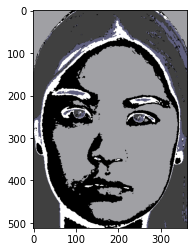

In [18]:
plt.imshow(pop_art)